
Centers of clusters:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]

Number of clusters in input data = 5


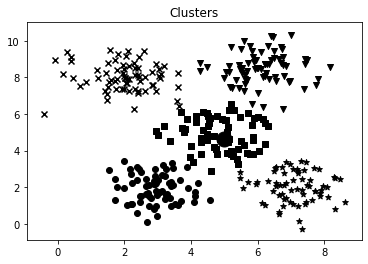

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle 

# Load data from input file
X = np.loadtxt('data_clustering.txt', delimiter=',')

# Estimate the bandwidth of X
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

# Let's train the Mean Shift clustering model using the estimated bandwidth:
# Cluster data with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

# Extract the centers of clusters
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

# Estimate the number of clusters
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)

# Plot the points and cluster centers
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Plot points that belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker,color='black')
    
# Plot the current cluster center
cluster_center = cluster_centers[i]
plt.plot(cluster_center[0], cluster_center[1], marker='o',markerfacecolor='black', markeredgecolor='black',markersize=15)
plt.title('Clusters')
plt.show()